This notebook is executed on kaggle.
# Importing training samples
**preprocessing and data-cleaning**

In [ ]:
import pandas as pd
train = pd.read_csv('/kaggle/input/facial-keypoints-detection/training.zip', compression='zip')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
train.isnull()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7045,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7046,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False
7047,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,False,False,False


In [ ]:
train_clean = train.dropna(axis=0, how='any', inplace=False)
train_clean = train_clean.reset_index(drop=True)

In [ ]:
import numpy as np
clean_imgs = []
for i in range(0, len(train_clean)):
  x_c = train_clean['Image'][i].split(' ') # split the pixel values based on the space
  clean_imgs.append(x_c)
clean_imgs_arr = np.array(clean_imgs, dtype='float')

In [ ]:
clean_imgs_arr = np.reshape(clean_imgs_arr, (train_clean.shape[0], 96, 96, 1))
train_ims_clean = clean_imgs_arr/255. # scale the images

In [ ]:
clean_keypoints_df = train_clean.drop('Image', axis=1)
clean_keypoints_arr = clean_keypoints_df.to_numpy()


In [ ]:
clean_keypoints_arr.shape

(2140, 30)

In [ ]:
def vis_im_keypoint_notstandard(img, points, axs):
  axs.imshow(img.reshape(96, 96))
  xcoords = (points[0::2] + 0.)
  ycoords = (points[1::2] + 0.)
  axs.scatter(xcoords, ycoords, color='red', marker='o')

# Adding Image-Augmentations

In [ ]:

import imgaug as ia
import imgaug.augmenters as iaa

#I used here a sequence of augmentations; flipping the picture and sometimes cropping the picture with a probability of 80%.

seq = iaa.Sequential([iaa.Crop(percent=(0, 0.2)),
                        iaa.Sometimes(
        0.80,iaa.OneOf([iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0))]))])

aug_ims = []
aug_pts = []
for im, pt in zip(train_ims_clean, clean_keypoints_arr):
    f_im = seq(image=im)
    aug_ims.append(im)
    aug_ims.append(f_im)
    aug_pts.append(pt)
    aug_pts.append(pt)
ims, keypoints = np.asarray(aug_ims), np.asarray(aug_pts)

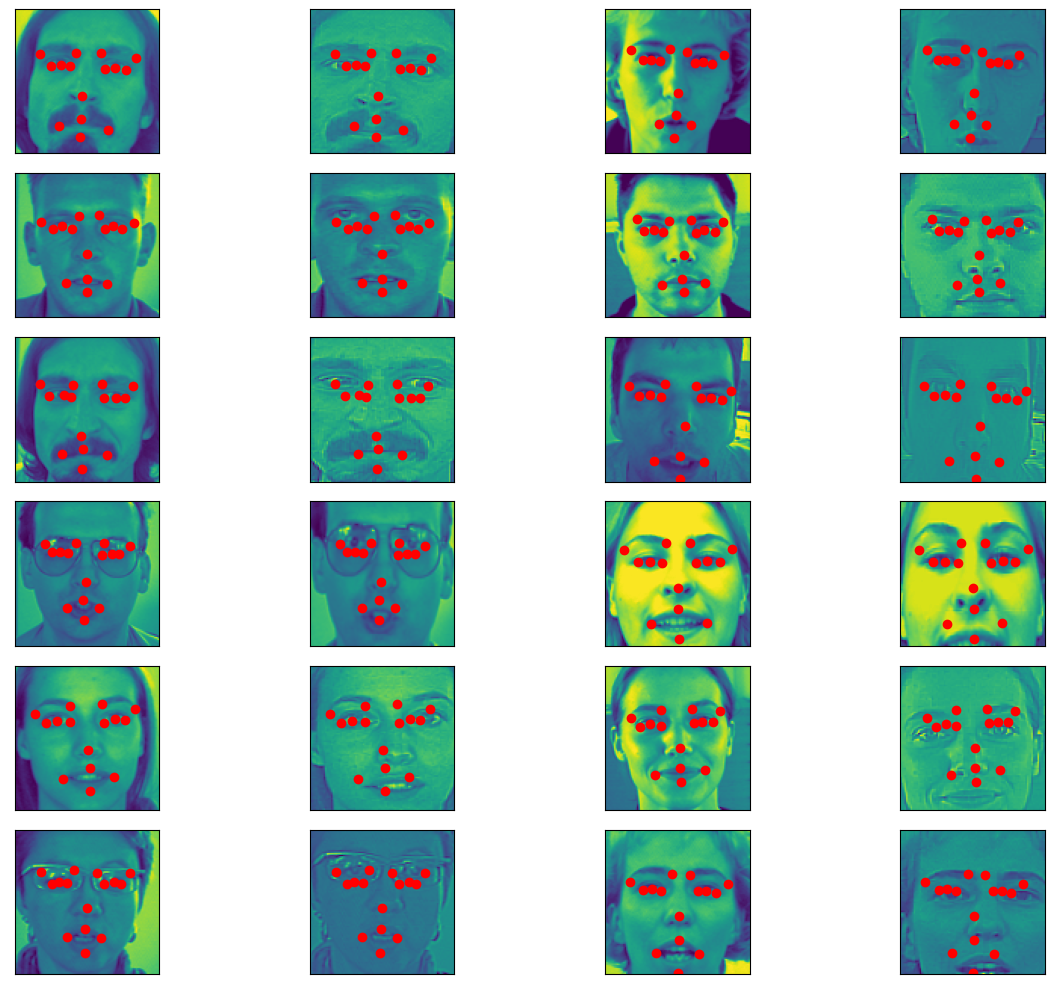

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 10))
npics= 24
count = 1
for i in range(npics):
  ipic = i # use this to see original and augmented image side by side
  ax = fig.add_subplot(npics//4 , 4, count, xticks=[],yticks=[])
  vis_im_keypoint_notstandard(ims[ipic], keypoints[ipic], ax)
  count +=  1




plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.tight_layout()

plt.show()

# Model definition and hyper-parameters tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(96, 96, 1),
                activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                        

In [ ]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

model.compile(optimizer='Adam' , loss=root_mean_squared_error)

#If we want to only display the rmse, then we could have used
#the (mertics) arguement.

In [ ]:
history = model.fit(ims,keypoints,epochs = 30)

Epoch 1/30
134/134 [==============================] - 4s 32ms/step - loss: 3.8328
Epoch 2/30
134/134 [==============================] - 4s 31ms/step - loss: 3.8673
Epoch 3/30
134/134 [==============================] - 4s 31ms/step - loss: 3.9542
Epoch 4/30
134/134 [==============================] - 4s 31ms/step - loss: 3.8449
Epoch 5/30
134/134 [==============================] - 4s 32ms/step - loss: 3.8013
Epoch 6/30
134/134 [==============================] - 4s 32ms/step - loss: 3.8605
Epoch 7/30
134/134 [==============================] - 4s 32ms/step - loss: 3.7824
Epoch 8/30
134/134 [==============================] - 4s 32ms/step - loss: 3.8321
Epoch 9/30
134/134 [==============================] - 4s 31ms/step - loss: 3.8231
Epoch 10/30
134/134 [==============================] - 4s 32ms/step - loss: 3.8236
Epoch 11/30
134/134 [==============================] - 4s 31ms/step - loss: 3.8164
Epoch 12/30
134/134 [==============================] - 4s 31ms/step - loss: 3.8625
Epoch 13/30
1

## Fine tuning using Keras tuner

In [ ]:
import kerastuner
from sklearn import model_selection

class CVTuner(kerastuner.engine.tuner.Tuner):
  def run_trial(self, trial, x, y, batch_size=32, epochs=1):
    cv = model_selection.KFold(5)
    val_losses = []
    for train_indices, test_indices in cv.split(x):
      x_train, x_test = x[train_indices], x[test_indices]
      y_train, y_test = y[train_indices], y[test_indices]
      model = self.hypermodel.build(trial.hyperparameters)
      model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
      val_losses.append(model.evaluate(x_test, y_test))
    self.oracle.update_trial(trial.trial_id, {'val_loss': np.mean(val_losses)})
    self.save_model(trial.trial_id, model)

tuner = kt.Hyperband(
    build_model,
    objective = 'val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    overwrite= True
)
x, y = ims,keypoints
tuner.search(x, y, batch_size=64, epochs=30)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
32                |?                 |units
2                 |?                 |tuner/epochs
0                 |?                 |tuner/initial_epoch
2                 |?                 |tuner/bracket
0                 |?                 |tuner/round

Epoch 1/2


InvalidArgumentError: Graph execution error:

Detected at node 'mean_squared_error/SquaredDifference' defined at (most recent call last):
    File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.7/asyncio/events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_23/3255333887.py", line 25, in <module>
      tuner.search(x, y, batch_size=64, epochs=30)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/engine/base_tuner.py", line 183, in search
      results = self.run_trial(trial, *fit_args, **fit_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/tuners/hyperband.py", line 384, in run_trial
      return super(Hyperband, self).run_trial(trial, *fit_args, **fit_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/engine/tuner.py", line 295, in run_trial
      obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/engine/tuner.py", line 222, in _build_and_fit_model
      results = self.hypermodel.fit(hp, model, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/engine/hypermodel.py", line 140, in fit
      return model.fit(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1083, in compute_loss
      y, y_pred, sample_weight, regularization_losses=self.losses
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 1500, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'mean_squared_error/SquaredDifference'
required broadcastable shapes
	 [[{{node mean_squared_error/SquaredDifference}}]] [Op:__inference_train_function_32573]

# Transfer-learning model (VGG19)

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = VGG19(include_top = False,
                   weights = 'imagenet',
                   input_shape = (96, 96, 1))

# Print base model summary
base_model.summary()

# Mark loaded layers as not trainable
for layer in base_model.layers:
  layer.trainable = False

# You can choose to fine-tune some of the final layers:
# for layer in base_model.layers[:25]:
#  layer.trainable = False

# You can pick which layers are trainable and which are not:
base_model.get_layer('block1_conv1').trainable = False


# Add new classifier layers
x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Define new model
Model_Transferred = Model(inputs = base_model.inputs, outputs = output)

# Print summary
Model_Transferred.summary()

# Compile
base_learning_rate = 0.0001
Model_Transferred.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])